# Es. 1

## a.

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create Graph

G = nx.DiGraph()
G.add_edges_from([('a','d'),('o','a'),('o','b'),('b','d'),('b','c'),('c','d')])
# print(G)

G['a']['d']['capacity'] = 2
G['o']['a']['capacity'] = 3
G['o']['b']['capacity'] = 3
G['b']['d']['capacity'] = 2
G['b']['c']['capacity'] = 3
G['c']['d']['capacity'] = 1

# a.

#  the capacity of a minimum capacity cut is equal to the flow value of a maximum flow
# To find the minimum aggregate capacity that needs to be removed for no feasible flow 
# from 'o' to 'd' to exists we can use the Ford and Fulkerson’s algorithm finding the maximum throughput
# from 'o' to 'd', then we can compute the minimum capacity cut 

cut_value, partition = nx.minimum_cut(G, 'o', 'd')
print(f"Minimum capacity: {cut_value}")



Minimum capacity: 5


## b.

In [14]:
# Compute initial maximum flow
maxFlow = nx.maximum_flow_value(G, 'o', 'd')

# Variable to count the capacity that can be removed
capacityRemoved = 0

# Control all the edges removing and re-adding the capacity at each step

for edge in G.edges():
    
    nodeSource, nodeTarget = edge
    
    capacity = G[nodeSource][nodeTarget]['capacity']
    
    G[nodeSource][nodeTarget]['capacity'] = 0
    
    # Compute the max flow 
    
    maxFlow2 = nx.maximum_flow_value(G, 'o', 'd')
    
    G[nodeSource][nodeTarget]['capacity'] = capacity
    
    # Compute the difference between the 2 throughput 
    
    differenceMax = maxFlow - maxFlow2
    
    # Update the capacity removed
    
    if differenceMax >= capacityRemoved: 
        capacityRemoved = differenceMax

        

print("The maximum aggregate capacity that can be removed is: ", capacityRemoved)        

The maximum aggregate capacity that can be removed is:  3


## c.

c. We add extra capacity on edges belonging to the min-cuts



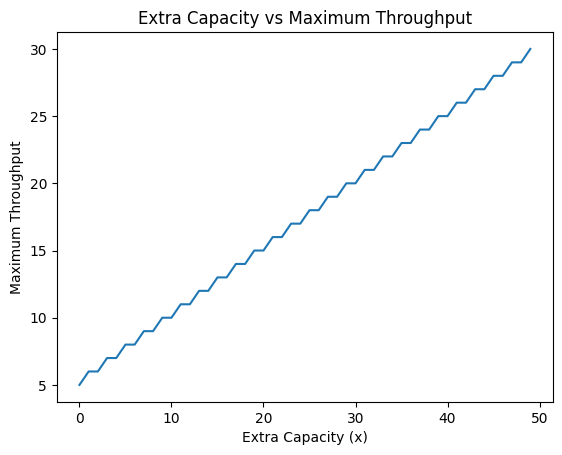

In [6]:
# c.

# The extra capacity should be added to the min-cuts edges in order to maximize the throughput 
# At each step we add one unit to the first min cut edge updating its capacity
# and we compute the maximum thorughput
# We do this while x is greater than 0

# Define a value for x=extra capacity 

x=1

# Initial throughput 
max_flow_no_extra = nx.maximum_flow_value(G, 'o', 'd')

list_x = [] 
list_throughputs = []
list_x.append(0)
list_throughputs.append(max_flow_no_extra)

while x < 50:
    
    # cut-value and partition 
    cut_value, partition = nx.minimum_cut(G, 'o', 'd')
    # edges of the min-cut
    reachable, non_reachable = partition
    
    # Set of edges belonging to the min-cuts
    cutset = set()
    for u, nbrs in ((n, G[n]) for n in reachable):
        cutset.update((u, v) for v in nbrs if v in non_reachable)
        
    # print(sorted(cutset))
    
    if len(cutset) > 0:
        
        # Get the first edge in the cut-set
        first_edge = next(iter(cutset)) 
        
        # Update the capacity of the first edge in the cut-set
        G[first_edge[0]][first_edge[1]]['capacity'] += 1
        
        list_x.append(x)
        x = x + 1 

        # Compute maximum throughput 
        max_flow_value = nx.maximum_flow_value(G, 'o', 'd')
        #print(max_flow_value)
        
        # Add max throughput to the list of throughputs
        list_throughputs.append(max_flow_value)

# Plotting
print("c. We add extra capacity on edges belonging to the min-cuts")
plt.plot(list_x, list_throughputs)
plt.xlabel('Extra Capacity (x)')
plt.ylabel('Maximum Throughput')
plt.title('Extra Capacity vs Maximum Throughput')
print()
plt.show()    

# Es. 2

## a.

In [16]:
#ESERCIZIO 2

import networkx as nx
import matplotlib.pyplot as plt


# Define the people and books
people = ['p1', 'p2', 'p3', 'p4']
books = ['b1', 'b2', 'b3', 'b4']

# Create a bipartite graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(people, bipartite=0)
G.add_nodes_from(books, bipartite=1)

# Define the interests of each person
interests = {
    'p1': ['b1', 'b2'],
    'p2': ['b2', 'b3'],
    'p3': ['b1', 'b4'],
    'p4': ['b1', 'b2', 'b4']
}


# Iterate through the 'interests' dictionary, where keys are people and values are lists of books they are interested in.
for person, person_books in interests.items():
    # For each person, iterate through their list of interested books.
    
    for book in person_books:
        # Add an edge between the person and the book in the bipartite graph.
        G.add_edge(person, book)



#In a bipartite graph, a matching is a set of edges without common vertices.
#A maximum matching is a matching of the largest possible size within the graph.
# Compute the maximum matching in a bipartite graph using NetworkX

matching = nx.bipartite.maximum_matching(G)
# Now 'matching' contains the maximum matching in the graph
# The results are represented as a dictionary where the keys are nodes from one set of the bipartite graph,
# and the values are the corresponding nodes from the other set, representing the edges in the maximum matching.

if len(matching) == len(people):
    print("perfect match")
else:
    print(len(matching))
    print("No perfect match")

# Add source and sink nodes
G.add_node('source')
G.add_node('sink')

# Iterate through the 'interests' dictionary, where keys are people and values are lists of books they are interested in.
for person, person_books in interests.items():
    # For each person, iterate through their list of interested books.
    G.add_edge('source', person)
    G['source'][person]['capacity'] = 1
    for book in person_books:
        # Add an edge between the person and the book in the bipartite graph.
        G.add_edge(person, book)
        G[person][book]['capacity'] = 1
        G.add_edge(book, 'sink')
        G[book]['sink']['capacity'] = 1
        
# Find the maximum flow
flow_value, flow_dict = nx.maximum_flow(G, 'source', 'sink')


# see lab3, pratically there is an analogy between maximal flow and perfect matching
print("Maximum flow: ", flow_value)
print(flow_dict)
print()
print("Since max-flow = V (node set of people), a perfect matching can exist")
print("In this case there is not perfect matching (matching != maximum_flow)")
    


8
No perfect match
Maximum flow:  4
{'p1': {'b1': 0, 'b2': 1, 'source': 0}, 'p2': {'b2': 0, 'b3': 1, 'source': 0}, 'p3': {'b1': 0, 'b4': 1, 'source': 0}, 'p4': {'b1': 1, 'b2': 0, 'b4': 0, 'source': 0}, 'b1': {'p1': 0, 'p3': 0, 'p4': 0, 'sink': 1}, 'b2': {'p1': 0, 'p2': 0, 'p4': 0, 'sink': 1}, 'b3': {'p2': 0, 'sink': 1}, 'b4': {'p3': 0, 'p4': 0, 'sink': 1}, 'source': {'p1': 1, 'p2': 1, 'p3': 1, 'p4': 1}, 'sink': {'b1': 0, 'b2': 0, 'b3': 0, 'b4': 0}}

Since max-flow = V (node set of people), a perfect matching can exist
In this case there is not perfect matching (matching != maximum_flow)


## b.

Maximum number of assigned books: 8
{'p1': {'source': 0, 'b1': 0, 'b2': 1}, 'p2': {'source': 0, 'b2': 1, 'b3': 1}, 'p3': {'source': 0, 'b1': 1, 'b4': 1}, 'p4': {'source': 0, 'b1': 1, 'b2': 1, 'b4': 1}, 'b1': {'sink': 2, 'p1': 0, 'p3': 0, 'p4': 0}, 'b2': {'sink': 3, 'p1': 0, 'p2': 0, 'p4': 0}, 'b3': {'sink': 1, 'p2': 0}, 'b4': {'sink': 2, 'p3': 0, 'p4': 0}, 'source': {'p1': 1, 'p2': 2, 'p3': 2, 'p4': 3}, 'sink': {'b1': 0, 'b2': 0, 'b3': 0, 'b4': 0}}


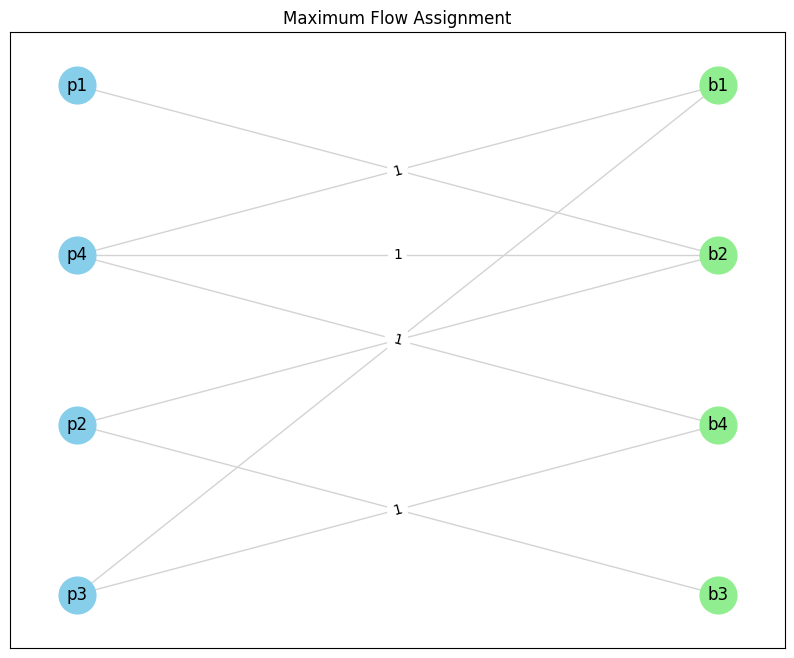

In [29]:
#Esercizio 2.2

# Create a bipartite graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(people, bipartite=0)
G.add_nodes_from(books, bipartite=1)

# Define the distribution of the number of book copies
book_copies = {'b1': 2, 'b2': 3, 'b3': 2, 'b4': 2}
people = ['p1', 'p2', 'p3', 'p4']

G.add_node('source')
G.add_node('sink')

# Add edges with capacities
for person in people:
    G.add_edge('source', person)
for book, copies in book_copies.items():
        G.add_edge(book, 'sink', capacity=copies)
        
for person, person_books in interests.items():
    # For each person, iterate through their list of interested books.
    for book in person_books:
        # Add an edge between the person and the book in the bipartite graph.
        G.add_edge(person, book, capacity=1)        
        
# Find the maximum flow
flow_value, flow_dict = nx.maximum_flow(G, 'source', 'sink')
print("Maximum number of assigned books:", flow_value)
print(flow_dict)

#Create a copy of the graph to modify it for plotting
flow_graph = G.copy()

# Remove the original arcs from the flow graph
flow_graph.remove_edges_from(list(G.edges()))

# Add only the arcs with positive flow from the solution
for source, targets in flow_dict.items():
    for target, flow in targets.items():
        if flow > 0:
            flow_graph.add_edge(source, target, capacity=flow)
#Remove nodes 'source' and 'sink' to improve visualization
flow_graph.remove_nodes_from(['source','sink'])


# Create a bipartite layout
pos = nx.bipartite_layout(flow_graph, nodes=people)

# Plotting the graph with coloring of the arcs with flux
edge_labels = {(u, v): d['capacity'] for u, v, d in flow_graph.edges(data=True)}

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(flow_graph, pos, nodelist=people, node_color='skyblue', node_size=700)
nx.draw_networkx_nodes(flow_graph, pos, nodelist=books, node_color='lightgreen', node_size=700)
nx.draw_networkx_labels(flow_graph, pos)
nx.draw_networkx_edges(flow_graph, pos, edgelist=flow_graph.edges(), edge_color='lightgray')
nx.draw_networkx_edge_labels(flow_graph, pos, edge_labels=edge_labels)

plt.title('Maximum Flow Assignment')
plt.show()

## c.

Book to buy: b1
Book to sell: b3
Max flow: 9


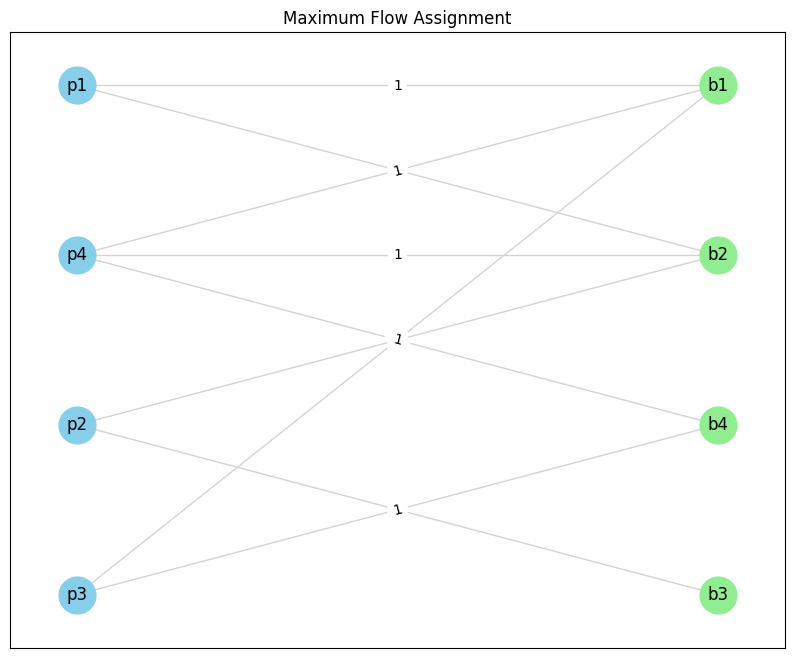

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#Save the actual flow value
max_flow = flow_value
# Create a bipartite graph
G = nx.Graph()

# Add nodes to the graph
people = ['p1', 'p2', 'p3', 'p4']
books = ['b1', 'b2', 'b3', 'b4']

G.add_nodes_from(people, bipartite=0)
G.add_nodes_from(books, bipartite=1)

# Define the distribution of the number of book copies
book_copies = {'b1': 2, 'b2': 3, 'b3': 2, 'b4': 2}

G.add_node('source')
G.add_node('sink')

# Add edges with capacities
for person in people:
    G.add_edge('source', person)

interests = {'p1': ['b1', 'b2'], 'p2': ['b2', 'b3'], 'p3': ['b1', 'b4'], 'p4': ['b1', 'b2', 'b4']}

for person, person_books in interests.items():
    # For each person, iterate through their list of interested books.
    for book in person_books:
        # Add an edge between the person and the book in the bipartite graph.
        G.add_edge(person, book, capacity=1)
        

#Estraction of keys and values of the actual distribution of copies
keys = list(book_copies.keys())
values = list(book_copies.values()) 
values = np.array(values)

#Create a list of dictionaries with  all the possible distribution of copies 
all_permutations = np.array([[1,-1,0,0],
                            [1,0,-1,0],
                            [1,0,0,-1],
                            [-1,1,0,0],
                            [-1,0,1,0],
                            [-1,0,0,1],
                            [0,1,-1,0],
                            [0,0,1,-1],
                            [0,0,-1,1],
                            [0,-1,1,0],
                            [0,1,0,-1],
                            [0,-1,0,1],
                            ])
dict_list = []
for i in all_permutations:
    dict_list.append(dict(zip(keys,i+values)))

#Iterate over the possible distribution and find if there is one with the max_flow greater then the original one     
for new_book_copies in dict_list:
    for book, copies in new_book_copies.items():
        G.add_edge(book, 'sink', capacity=copies)
    max_flow_value, max_flow_dict = nx.maximum_flow(G, 'source', 'sink')
    if max_flow_value > max_flow:
        new_values = np.array(list(new_book_copies.values()))
        control_list = new_values - np.array(values)
        for i in range(len(control_list)):
            if control_list[i] == 1:
                print('Book to buy:',keys[i])
            if control_list[i] == -1:
                print('Book to sell:',keys[i])
        print('Max flow:',max_flow_value)
        flow_graph = G.copy()

        # Remove the original arcs from the flow graph
        flow_graph.remove_edges_from(list(G.edges()))

        # Add only the arcs with positive flow from the solution
        for source, targets in max_flow_dict.items():
            for target, flow in targets.items():
                if flow > 0:
                    flow_graph.add_edge(source, target, capacity=flow)
                    
        #Remove nodes 'source' and 'sink' to improve visualization 
        flow_graph.remove_nodes_from(['source','sink'])
        # Create a bipartite layout
        pos = nx.bipartite_layout(flow_graph, nodes=people)

        # Plotting the graph with coloring of the arcs with flux
        edge_labels = {(u, v): d['capacity'] for u, v, d in flow_graph.edges(data=True)}

        plt.figure(figsize=(10, 8))
        nx.draw_networkx_nodes(flow_graph, pos, nodelist=people, node_color='skyblue', node_size=700)
        nx.draw_networkx_nodes(flow_graph, pos, nodelist=books, node_color='lightgreen', node_size=700)
        nx.draw_networkx_labels(flow_graph, pos)
        nx.draw_networkx_edges(flow_graph, pos, edgelist=flow_graph.edges(), edge_color='lightgray')
        nx.draw_networkx_edge_labels(flow_graph, pos, edge_labels=edge_labels)

        plt.title('Maximum Flow Assignment')
        plt.show()
           

        




# Es. 3 

Import data 


In [1]:
# EX. 3

import scipy
import cvxpy as cp
import numpy as np
import networkx as nx

# f: vector of flows
f = scipy.io.loadmat("flow.mat")["flow"].reshape(28,)
print("f =", f)

# C: vector of capacities
C = scipy.io.loadmat("capacities.mat")["capacities"].reshape(28,)
print("C =", C)

# B: node-link incidence matrix for the traffic network
B = scipy.io.loadmat("traffic.mat")["traffic"]
print("B =", B)

# l: vector of minimum travelling time when road is empty
l = scipy.io.loadmat("traveltime.mat")["traveltime"].reshape(28,)
print("l =", l)

n_edges = B.shape[1]

tau = 1
nu = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]) * tau # it means: start in 1 and end in 17

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
num_nodes, num_edges = B.shape
for i in range(num_nodes):
    G.add_node(i + 1)

    
for i in range(num_edges):
    for j in range(num_nodes):
        if B[j, i] == -1:
            enterNode = j+1
        if B[j, i] == 1:
            outNode = j+1    
    G.add_edge(outNode, enterNode, capacity=C[i])  # Add capacity 


f = [ 7000  6537 11139  9282  9282  6398  6728  5988  5951  9557  7423  7423
  6814  8536  7652  6537 11924  9640  8161  8603  7974  9446  5562  6719
  9455  6686 10833  7403]
C = [ 8741  9864 13350 10926 13707  6960  7422  6678  6297 11102  8899  8970
  9753  9719  9083  7416 13353 11216 10947 10019  8732 10763  6677  9403
 10355  9067 11990  8258]
B = [[ 1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [-1  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0 -1  1  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0 -1  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0 -1  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0 -1  1  0  0 -1  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0 -

## a. 

In [28]:
v = cp.Variable(n_edges)

# We want to find a path that minimizes the travelling time, 
# so we construct an optimization problem with this objective function
objective = cp.Minimize(l @ v)

# Define constraints
constraints = [B @ v == nu, v >= 0]  

# Define the problem with objective and constraints
prob = cp.Problem(objective, constraints)

# Solve the problem
result = prob.solve(solver=cp.ECOS)

# In the optimal values of edges flow we can see the highest values corresponding to the edges of the shortest path

print("Optimal values of flows:", v.value)


Optimal values of flows: [1.62820000e+04 1.62820000e+04 2.11589571e-06 9.58645505e-07
 2.09370921e-05 1.90920547e-05 1.29954441e-05 6.38710236e-06
 1.62819997e+04 1.51548077e-06 3.72645294e-06 1.62820000e+04
 1.15725044e-06 9.58645538e-07 1.84503740e-06 8.28719354e-06
 1.16993511e-06 7.61209129e-06 1.03347947e-05 2.76853558e-04
 1.64584015e-05 2.93311959e-04 6.36624328e-06 2.16358665e-06
 1.62820000e+04 7.32488865e-06 3.33352149e-06 3.33352132e-06]


C:\Users\emanu\anaconda3\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


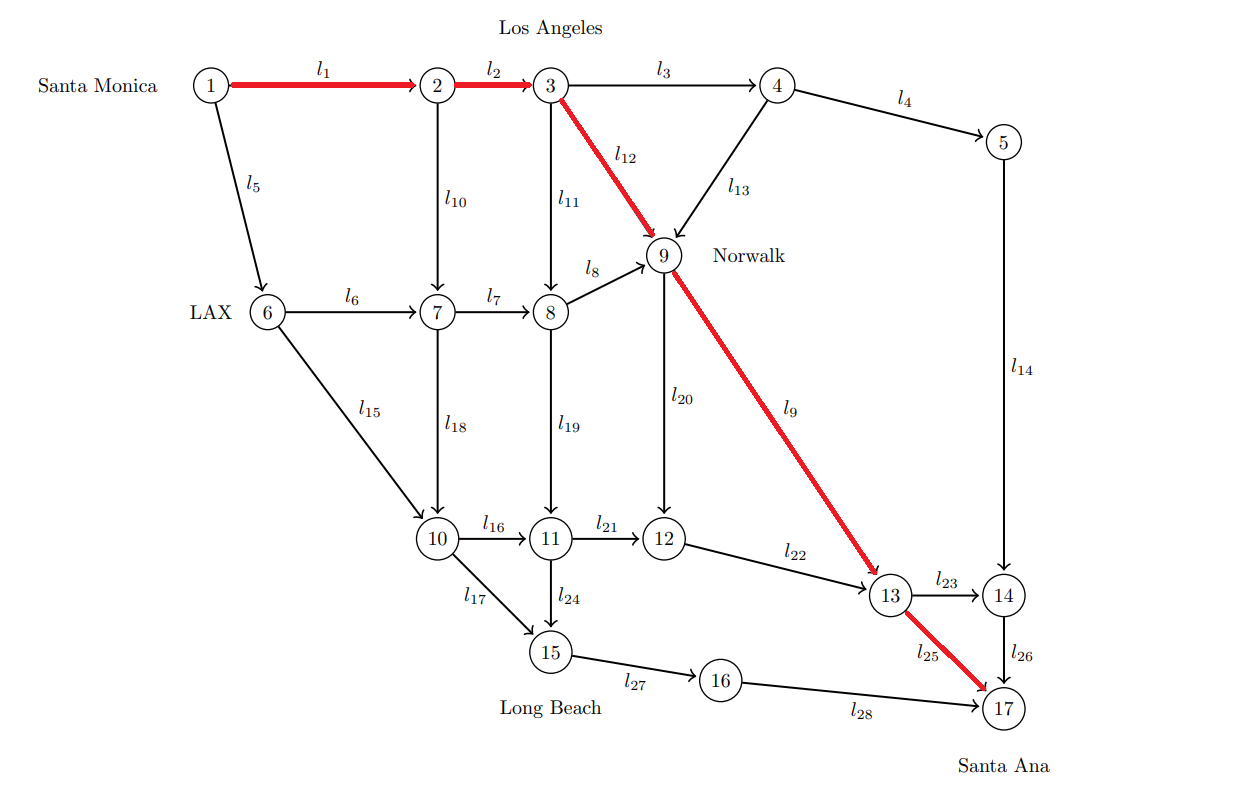

## b.

In [29]:
max_flow_value, max_flow_dict = nx.maximum_flow(G, 1, 17)

print("max_flow: ", max_flow_value)

max_flow:  22448


## c.

In [30]:
# Compute the external inflow ν using matrix multiplication
v = B.dot(f)

print("External inflow ν satisfying Bf = ν:")
print()
print(v)

External inflow ν satisfying Bf = ν:

[ 16282   9094  19448   4957   -746   4768    413     -2  -5671   1169
     -5  -7131   -380  -7412  -7810  -3430 -23544]


## d.

C:\Users\emanu\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


The social optimum given the new delay function is:

[6.45414539e+03 5.91932428e+03 2.99516805e+03 2.99516788e+03
 9.82785461e+03 4.49708605e+03 2.89752532e+03 2.43604914e+03
 3.04735680e+03 5.34821108e+02 1.12470017e-03 2.92415511e+03
 1.69543347e-04 2.99516788e+03 5.33076856e+03 2.73079595e+03
 4.73435444e+03 2.13438183e+03 4.61477314e+02 2.31284761e+03
 3.19227304e+03 5.50512064e+03 2.31064732e+03 2.29533614e-04
 6.24183013e+03 5.30581520e+03 4.73435467e+03 4.73435467e+03]

Optimum result:  23835.48447430158


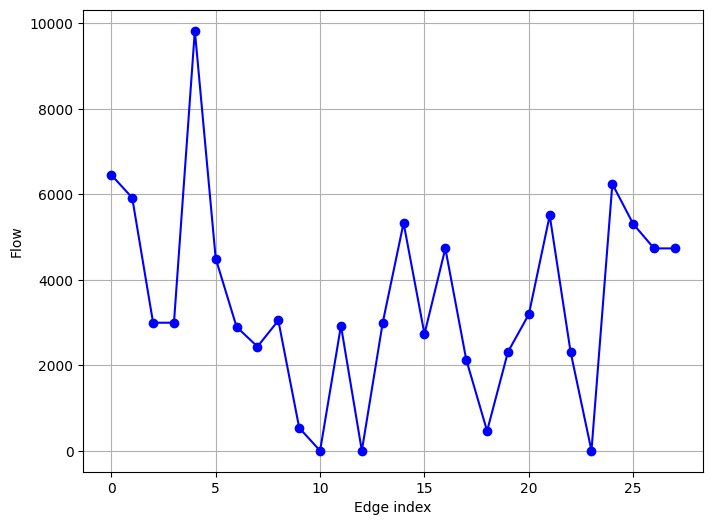

In [27]:
import numpy as np
tau=1
nu = np.array([16282, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -16282]) * tau 

v = cp.Variable(n_edges)
objective = cp.Minimize((l*C*C) @ cp.inv_pos(C-v) - l @ C)
constraints = [B @ v == nu, v >= 0, v<=C]
prob = cp.Problem(objective, constraints)
optimum_result = prob.solve(solver=cp.ECOS)
optimum_flow = v.value

print("The social optimum given the new delay function is:")
print()
print(optimum_flow)
print()
print("Optimum result: ", optimum_result)

import matplotlib.pyplot as plt

x_values = np.arange(len(v.value))

# Plotting the line graph
plt.figure(figsize=(8, 6))
plt.plot(x_values, v.value, marker='o', linestyle='-', color='b')  # Adjust linestyle, marker, and color as needed
plt.title('')
plt.xlabel('Edge index')
plt.ylabel('Flow')
plt.grid(True)
plt.show()


## e.

Wardrop equilibrium:

[6.53248293e+03 6.53248212e+03 2.20678784e+03 2.20678769e+03
 9.74951700e+03 4.49336733e+03 2.71426833e+03 2.20386170e+03
 3.34278606e+03 8.04549671e-04 1.88858723e+02 4.13683556e+03
 1.44638395e-04 2.20678769e+03 5.25614967e+03 2.24738306e+03
 4.78786641e+03 1.77909980e+03 6.99265353e+02 2.99791135e+03
 2.94664821e+03 5.94455956e+03 2.50794044e+03 2.03543198e-04
 6.77940517e+03 4.71472814e+03 4.78786662e+03 4.78786662e+03]

 Cost Wardrop:  14931.387725655395


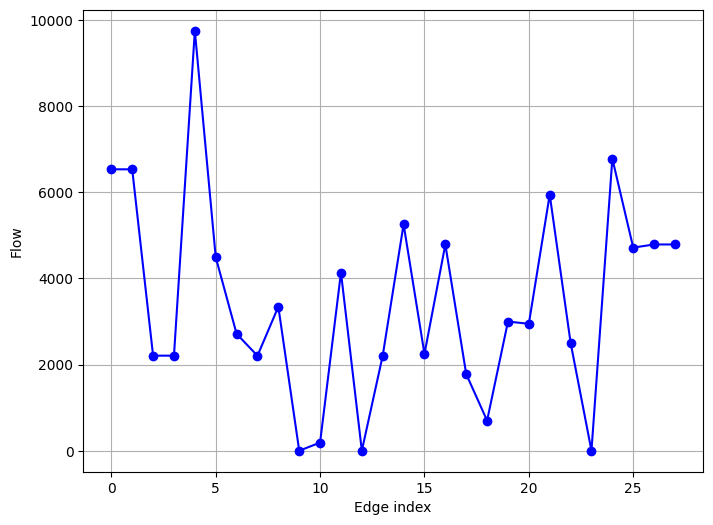

In [29]:
# As cost function we use the sum of the integrals of the previous delay function 
import matplotlib.pyplot as plt
import numpy as np

tau = 1
nu = np.array([16282, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -16282]) * tau 

v = cp.Variable(n_edges)
objective = cp.Minimize(cp.sum(-l * C @ cp.log((C-v)/C)))
constraints = [B @ v == nu, v >= 0, v<=C]
prob = cp.Problem(objective, constraints)
result = prob.solve(solver=cp.ECOS)

print("Wardrop equilibrium:")
print()
print(v.value)
print("\n Cost Wardrop: ", result)

x_values = np.arange(len(v.value))

wardrop = v.value

# Plotting the line graph
plt.figure(figsize=(8, 6))
plt.plot(x_values, v.value, marker='o', linestyle='-', color='b')  # Adjust linestyle, marker, and color as needed
plt.title('')
plt.xlabel('Edge index')
plt.ylabel('Flow')
plt.grid(True)
plt.show()

C:\Users\emanu\anaconda3\lib\site-packages\cvxpy\expressions\expression.py:621: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 34 times so far.

  warnings.warn(msg, UserWarning)
C:\Users\emanu\anaconda3\lib\site-packages\cvxpy\expressions\expression.py:621: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 35 times so far.

  warnings.warn(msg, UserWarning)



Compute the new Wardrop equlibrium introducing tolls on links as specified.

[6.45396456e+03 5.91965062e+03 2.99554989e+03 2.99554983e+03
 9.82803537e+03 4.49702117e+03 2.89718447e+03 2.43581311e+03
 3.04728814e+03 5.34313937e+02 3.16856008e-04 2.92410041e+03
 6.65294277e-05 2.99554983e+03 5.33101420e+03 2.73102252e+03
 4.73414231e+03 2.13415064e+03 4.61371683e+02 2.31262545e+03
 3.19239411e+03 5.50501956e+03 2.31025864e+03 8.60870569e-05
 6.24204906e+03 5.30580846e+03 4.73414240e+03 4.73414240e+03]

 Cost:  52755.697470921084


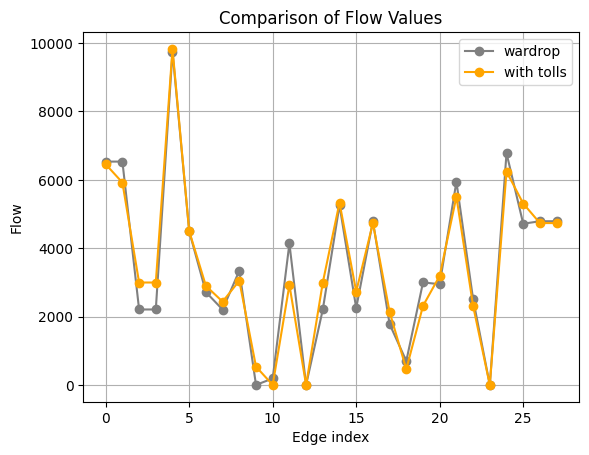

In [30]:
# Introduce tolls 

v = cp.Variable(n_edges)

omega = optimum_flow * l * C / (C-optimum_flow)**2
newDelay = -l*C*cp.log((C-v)/C) + omega * v
objective = cp.Minimize(cp.sum(newDelay))
constraints = [B @ v == nu, v >= 0]
prob = cp.Problem(objective, constraints)
result = prob.solve(solver=cp.ECOS)

print()
print("Compute the new Wardrop equlibrium introducing tolls on links as specified.")
print()
print(v.value)
print("\n Cost: ", result)

import matplotlib.pyplot as plt

plt.plot(x_values, wardrop, marker='o', linestyle='-', color='grey', label='wardrop')  
plt.plot(x_values, v.value, marker='o', linestyle='-', color='orange', label='with tolls')  
# Add more plt.plot() calls for additional flows, using different colors/markers/linestyles

plt.title('Comparison of Flow Values')
plt.xlabel('Edge index')
plt.ylabel('Flow')
plt.legend()  # Show legend based on the 'label' parameter in plt.plot()
plt.grid(True)
plt.show()



## g. PART 1


In [75]:
# g. Instead of the total travel time, let the cost for the system be the total additional travel time
# compared to the total travel time in free flow


# 1) compute system optimum flow f* for this cost

v = cp.Variable(n_edges)
newCost = (l*C*C) @ cp.inv_pos(C-v) - l @ C - l @ v
objective = cp.Minimize(cp.sum(newCost))
constraints = [B @ v == nu, v >= 0]
prob = cp.Problem(objective, constraints)
optimum_result = prob.solve()
optimum_flow = v.value
print("The social optimum is:")
print()
print(optimum_flow)
print("Cost: ", optimum_result)

# 2) construct the toll to make the wardrop equal to the social optimum

v = cp.Variable(n_edges)

omega = (optimum_flow * l * C / (C-optimum_flow)**2)  - l

newDelay = -l * C @ cp.log((C-v)/C) + omega @ v

objective = cp.Minimize(newDelay)
constraints = [B @ v == nu, v >= 0]
prob = cp.Problem(objective, constraints)
optimum_result = prob.solve()
optimum_flow = v.value

print("The social optimum given the cost is:")
print()
print(optimum_flow)

print("Cost: ", optimum_result)

The social optimum is:

[6.46810513e+03 5.61798382e+03 3.29758581e+03 3.29758551e+03
 9.81389487e+03 4.50159021e+03 3.00281863e+03 2.56413748e+03
 2.91779019e+03 8.50121309e+02 1.48810781e-03 2.32039652e+03
 2.96213124e-04 3.29758551e+03 5.31230467e+03 2.93146731e+03
 4.72973025e+03 2.34889289e+03 4.38682632e+02 1.96674410e+03
 3.37014959e+03 5.33689369e+03 2.14298855e+03 3.46968673e-04
 6.11169534e+03 5.44057406e+03 4.72973060e+03 4.72973060e+03]
13334.304858714098
The social optimum given the cost is:

[6.46799915e+03 5.61797787e+03 3.29747747e+03 3.29747655e+03
 9.81400070e+03 4.50158874e+03 3.00279537e+03 2.56413248e+03
 2.91793583e+03 8.50021275e+02 1.50193103e-03 2.32049890e+03
 9.28229775e-04 3.29747655e+03 5.31241196e+03 2.93151701e+03
 4.72970960e+03 2.34881465e+03 4.38664386e+02 1.96669648e+03
 3.37018103e+03 5.33687751e+03 2.14289033e+03 3.61403834e-04
 6.11192301e+03 5.44036688e+03 4.72970996e+03 4.72970996e+03]
Cost:  42023.35495198004
